<a href="https://colab.research.google.com/github/pandashreyan/PRODIGY_ML_01/blob/main/House_price_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#kaggle datasets download -d iamsouravbanerjee/house-rent-prediction-dataset

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"shreyanpanda","key":"387133113020b193d088332453430d6b"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d camnugent/california-housing-prices

Dataset URL: https://www.kaggle.com/datasets/camnugent/california-housing-prices
License(s): CC0-1.0
california-housing-prices.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/california-housing-prices.zip

Archive:  /content/california-housing-prices.zip
replace housing.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

linear regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/housing.csv")

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

In [ ]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x = df.drop(['median_house_value'],axis=1)
y = df['median_house_value']

In [ ]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.05)

In [ ]:
train_data = x_train.join(y_train)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
19142,-122.69,38.32,15.0,2536.0,414.0,1400.0,426.0,5.6613,<1H OCEAN,172400.0
2166,-119.83,36.77,23.0,2168.0,503.0,1190.0,425.0,2.6250,INLAND,71600.0
19012,-122.01,38.35,18.0,4486.0,723.0,1600.0,697.0,3.8651,INLAND,189700.0
18126,-122.03,37.34,16.0,1755.0,410.0,674.0,410.0,5.1602,<1H OCEAN,231200.0
15152,-117.05,33.01,17.0,3430.0,425.0,1468.0,433.0,10.6186,<1H OCEAN,429300.0
...,...,...,...,...,...,...,...,...,...,...
15242,-117.25,32.99,10.0,4926.0,749.0,1478.0,634.0,7.4720,NEAR OCEAN,439900.0
12994,-121.25,38.69,24.0,1014.0,185.0,606.0,194.0,4.1607,INLAND,112800.0
12465,-121.43,38.57,46.0,2443.0,476.0,939.0,457.0,3.5893,INLAND,142000.0
7551,-118.21,33.92,36.0,602.0,150.0,645.0,145.0,3.1964,<1H OCEAN,115400.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

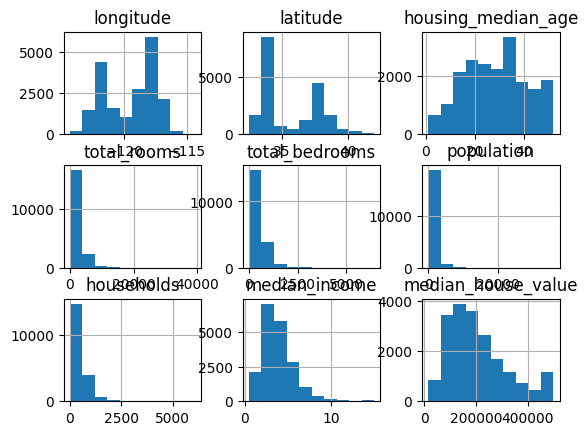

In [ ]:
train_data.hist()

<Axes: >

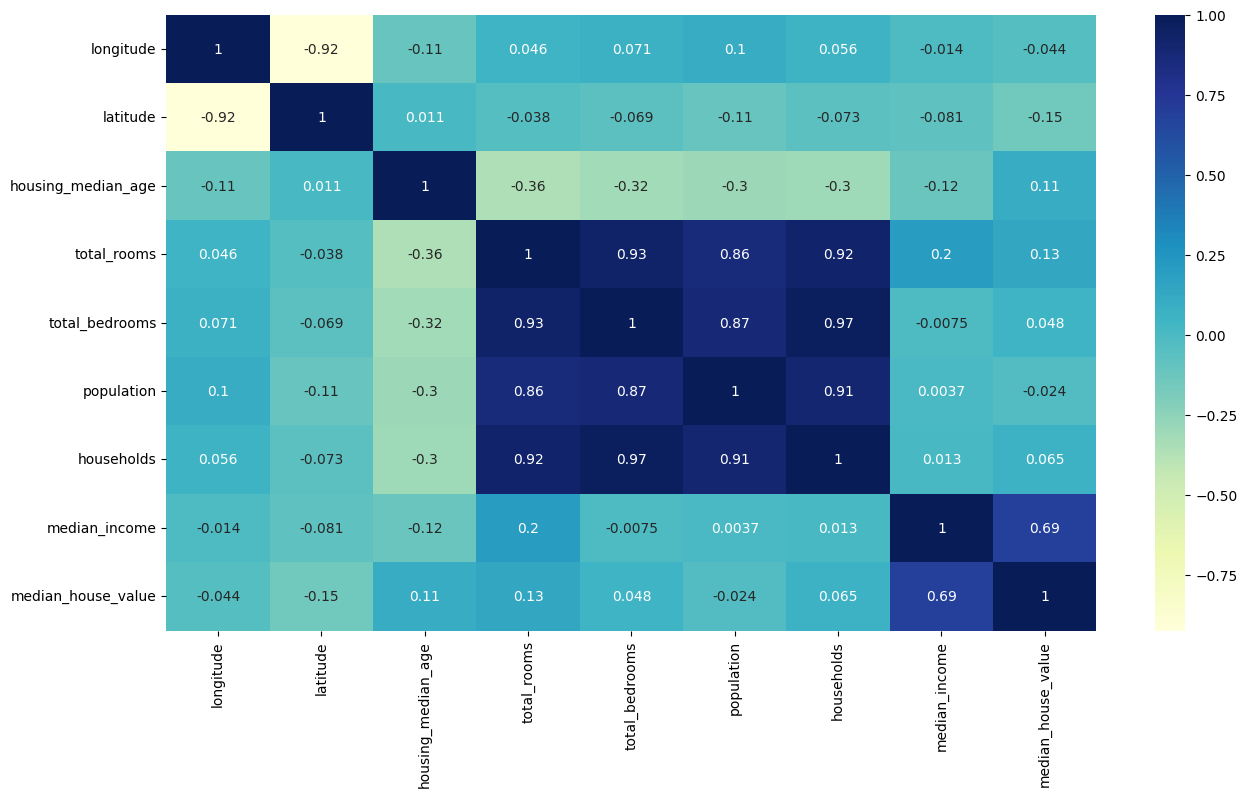

In [ ]:
plt.figure(figsize=(15,8))
#sns.heatmap(train_data.corr(exclude ='object'),annot= True,cmap="YlGnBu")
my_df = train_data.select_dtypes(exclude=[object])
sns.heatmap(my_df.corr(),annot= True,cmap="YlGnBu")

In [ ]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] +1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

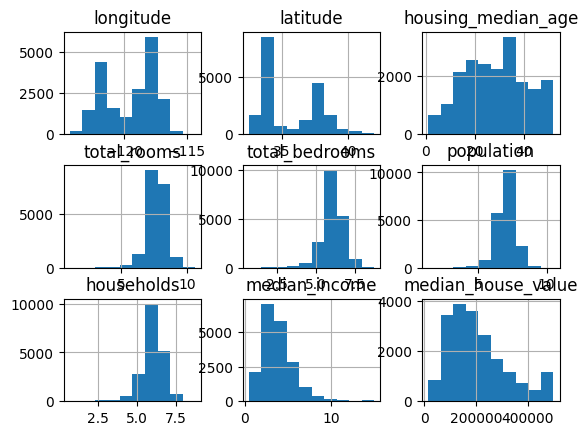

In [ ]:
train_data.hist()

In [ ]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     8681
INLAND        6223
NEAR OCEAN    2521
NEAR BAY      2178
ISLAND           5
Name: count, dtype: int64

In [ ]:
#train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis =1)
pd.get_dummies(train_data.ocean_proximity,dtype= int)


,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
19142,1,0,0,0,0
2166,0,1,0,0,0
19012,0,1,0,0,0
18126,1,0,0,0,0
15152,1,0,0,0,0
...,...,...,...,...,...
15242,0,0,0,0,1
12994,0,1,0,0,0
12465,0,1,0,0,0
7551,1,0,0,0,0


In [ ]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity,dtype = int)).drop(['ocean_proximity'],axis =1)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
19142,-122.69,38.32,15.0,7.838738,6.028279,7.244942,6.056784,5.6613,172400.0,1,0,0,0,0
2166,-119.83,36.77,23.0,7.682022,6.222576,7.082549,6.054439,2.6250,71600.0,0,1,0,0,0
19012,-122.01,38.35,18.0,8.408940,6.584791,7.378384,6.548219,3.8651,189700.0,0,1,0,0,0
18126,-122.03,37.34,16.0,7.470794,6.018593,6.514713,6.018593,5.1602,231200.0,1,0,0,0,0
15152,-117.05,33.01,17.0,8.140607,6.054439,7.292337,6.073045,10.6186,429300.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15242,-117.25,32.99,10.0,8.502486,6.620073,7.299121,6.453625,7.4720,439900.0,0,0,0,0,1
12994,-121.25,38.69,24.0,6.922644,5.225747,6.408529,5.273000,4.1607,112800.0,0,1,0,0,0
12465,-121.43,38.57,46.0,7.801391,6.167516,6.845880,6.126869,3.5893,142000.0,0,1,0,0,0
7551,-118.21,33.92,36.0,6.401917,5.017280,6.470800,4.983607,3.1964,115400.0,1,0,0,0,0


<Axes: >

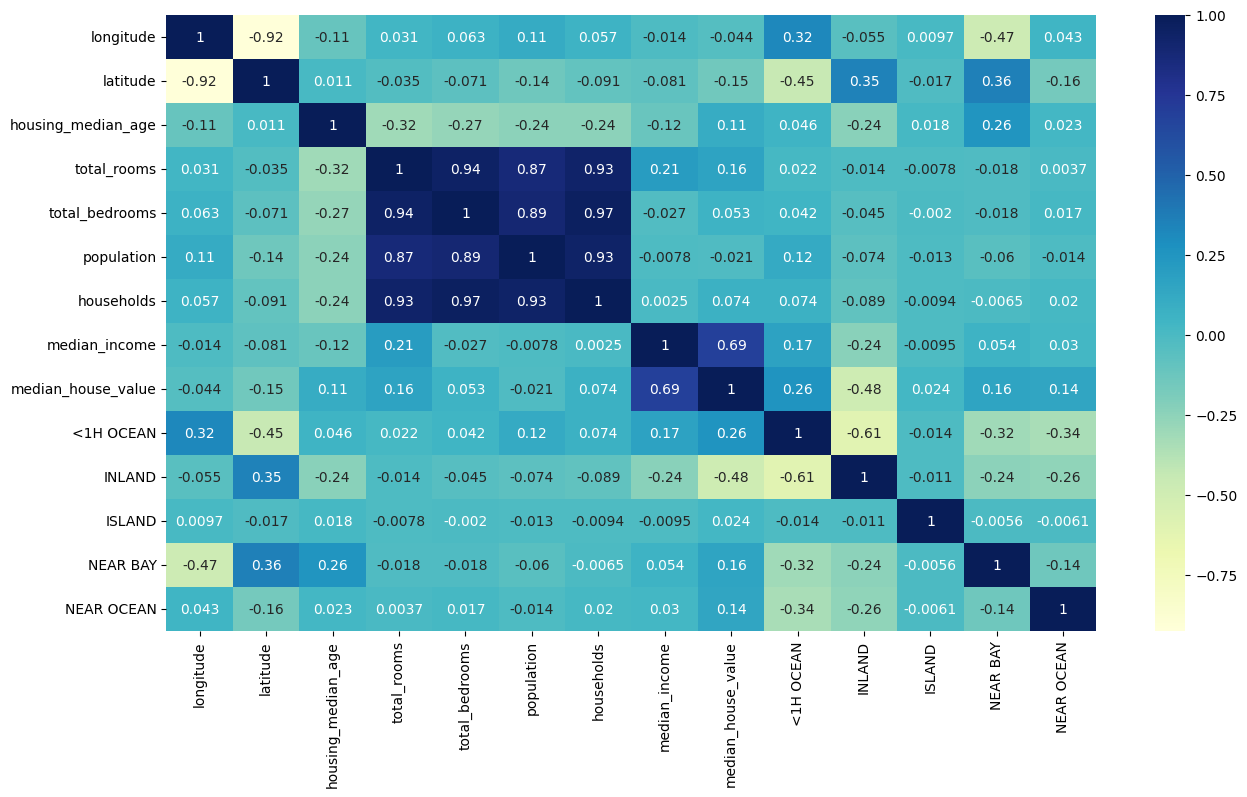

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot= True,cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

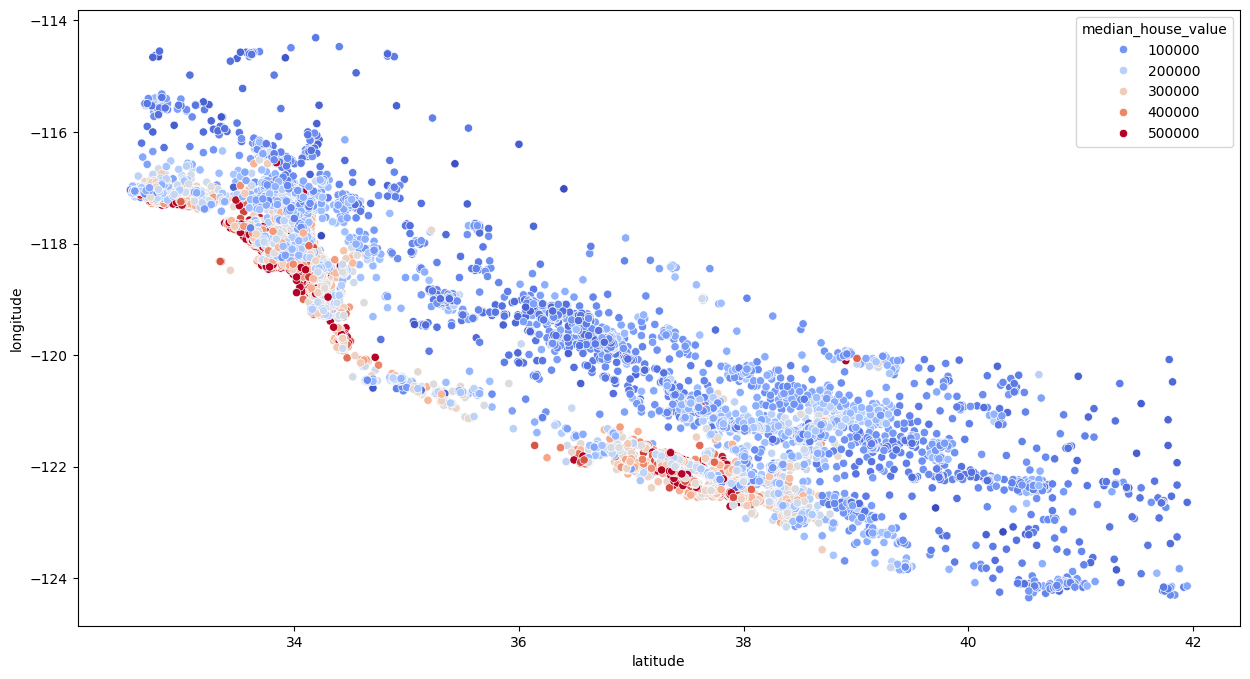

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x = "latitude",y="longitude",data = train_data,hue = "median_house_value",palette ="coolwarm")

In [ ]:
from sklearn.linear_model import LinearRegression
x_train = train_data.drop(['median_house_value'],axis=1)
y_train = train_data['median_house_value']
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
reg.score(x_test,y_test)

0.6961369346363465

In [ ]:
test_data = x_test.join(y_test)
test_data['total_rooms'] = np.log(test_data['total_rooms'] +1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity,dtype = int)).drop(['ocean_proximity'],axis =1)

In [ ]:
x_test = test_data.drop(['median_house_value'],axis=1)
y_test = test_data['median_house_value']

In [ ]:
reg.fit(x_test,y_test)
reg.score(x_test,y_test)

0.6961369346363465

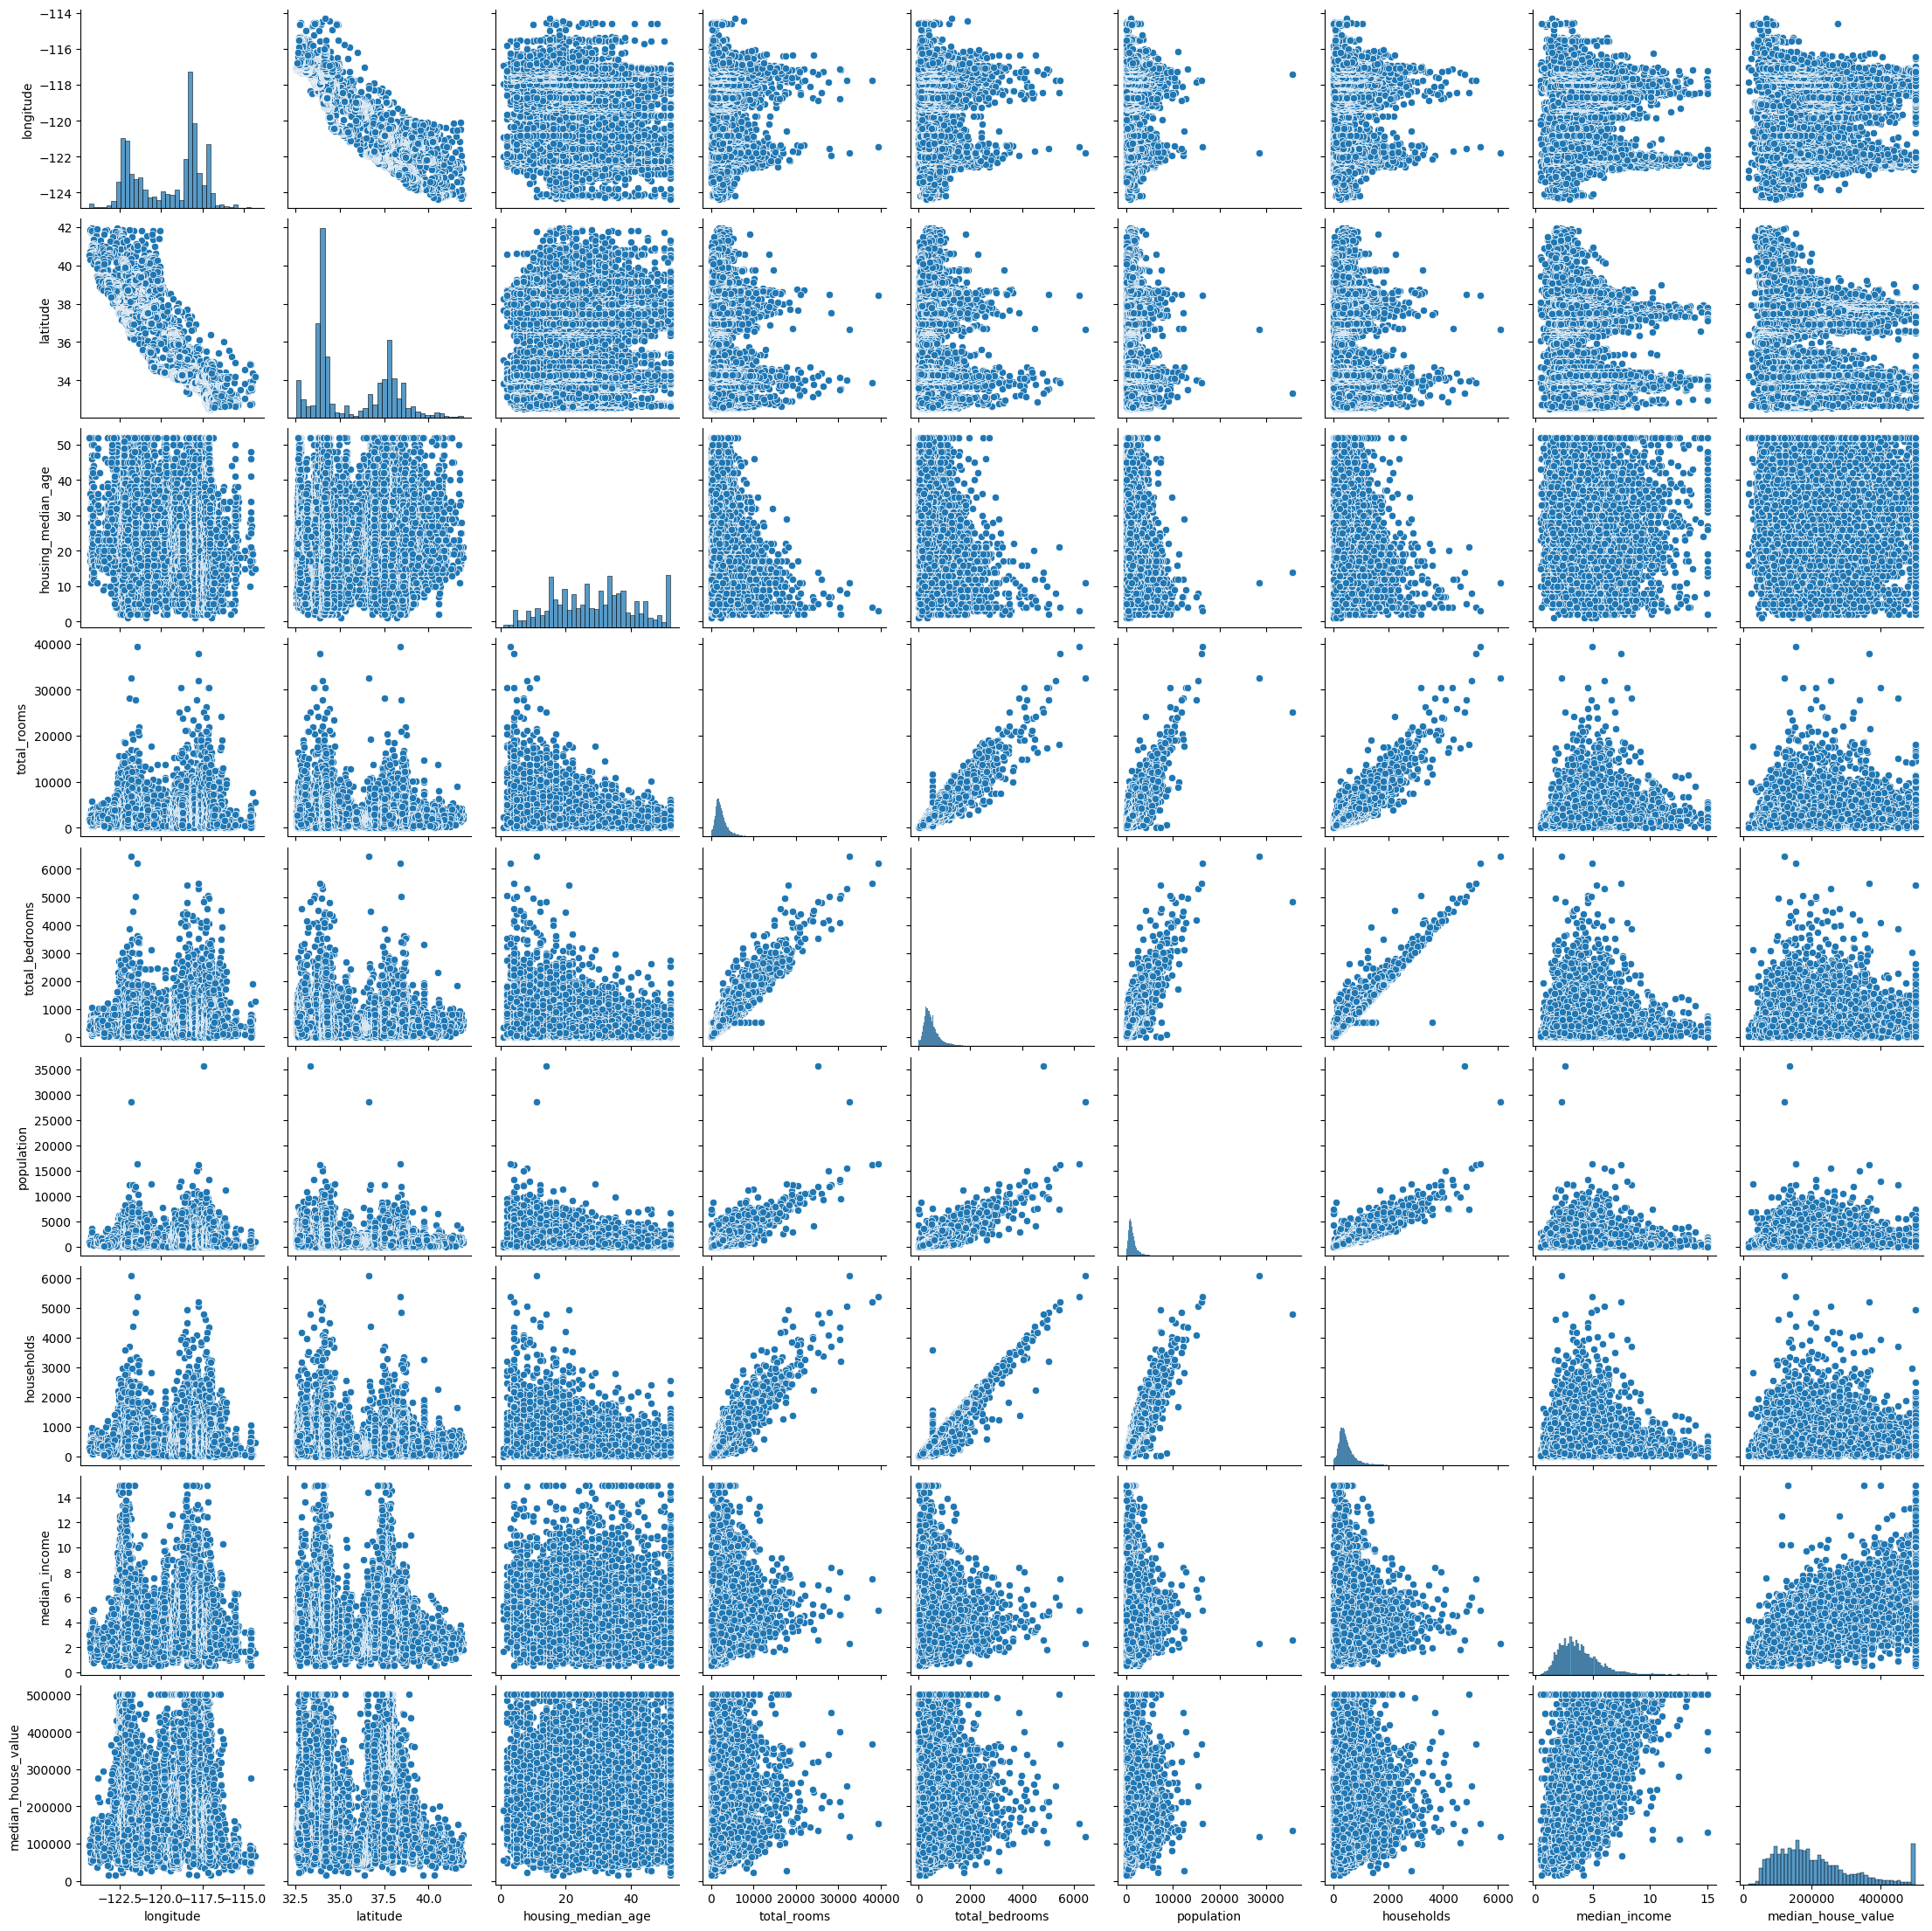

In [ ]:
sns.pairplot(df)
plt.show()